In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import scipy.fftpack
from matplotlib.pylab import rcParams
from operator import itemgetter
rcParams['figure.figsize'] = 15, 6
%matplotlib inline
sns.set()

# Load Data

In [38]:
#load data
df_1 = pd.read_csv('data/green_tripdata_2017-01.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_2 = pd.read_csv('data/green_tripdata_2017-02.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_3 = pd.read_csv('data/green_tripdata_2017-03.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_4 = pd.read_csv('data/green_tripdata_2017-04.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_5 = pd.read_csv('data/green_tripdata_2017-05.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_6 = pd.read_csv('data/green_tripdata_2017-06.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_7 = pd.read_csv('data/green_tripdata_2017-07.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_8 = pd.read_csv('data/green_tripdata_2017-08.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_9 = pd.read_csv('data/green_tripdata_2017-09.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_10 = pd.read_csv('data/green_tripdata_2017-10.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_11 = pd.read_csv('data/green_tripdata_2017-11.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_12 = pd.read_csv('data/green_tripdata_2017-12.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")

In [39]:
frames = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12]
df = pd.concat(frames)

In [40]:
df = df['2017']

In [41]:
df.head()

,VendorID,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:01:15,2,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
2017-01-01 00:03:34,2,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0
2017-01-01 00:04:02,2,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
2017-01-01 00:01:40,2,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
2017-01-01 00:00:51,2,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0


# Basic Visualization
## Trip Distance

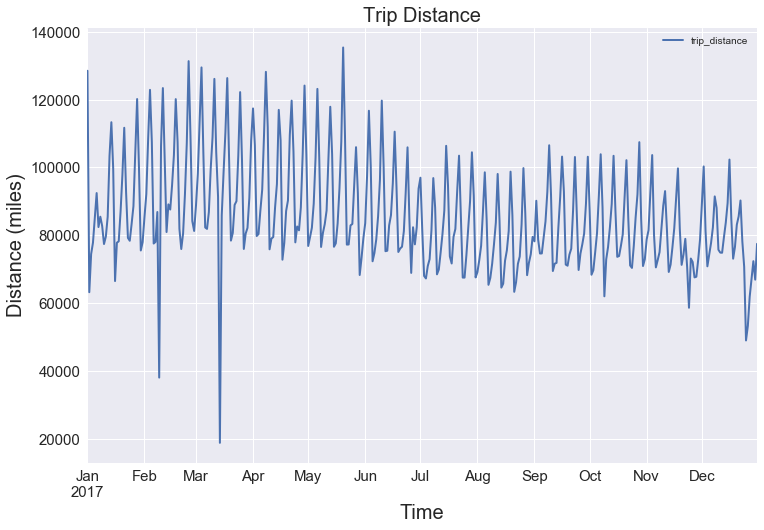

In [42]:
trip_distance = pd.DataFrame()
trip_distance['trip_distance'] = df.trip_distance.resample('D').sum()
ax = trip_distance.plot(figsize=(12,8), linewidth=2, fontsize=15)
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2017-12-31'))
plt.xlabel('Time', fontsize=20);
plt.ylabel('Distance (miles)', fontsize=20);
plt.title('Trip Distance', fontsize=20);
plt.savefig('trip_distance.jpg')

## Passenger Count

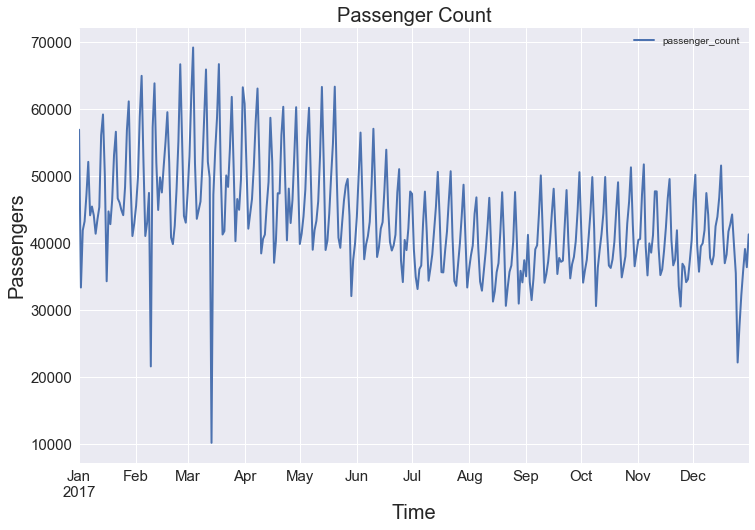

In [46]:
passenger_count = pd.DataFrame()
passenger_count['passenger_count'] = df.passenger_count.resample('D').sum()
ax = passenger_count.plot(figsize=(12,8), linewidth=2, fontsize=15)
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2017-12-31'))
plt.xlabel('Time', fontsize=20);
plt.ylabel('Passengers', fontsize=20);
plt.title('Passenger Count', fontsize=20);
plt.savefig('passenger_count_1.jpg')

## Tip Amount

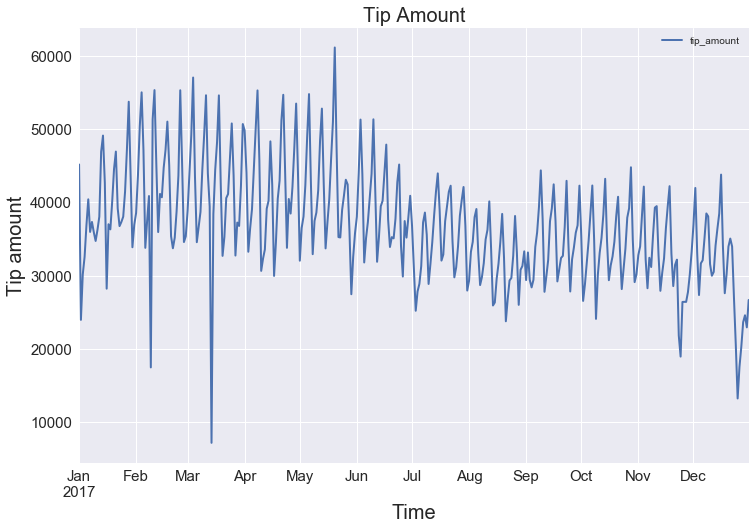

In [47]:
tip_amount = pd.DataFrame()
tip_amount['tip_amount'] = df.tip_amount.resample('D').sum()
ax = tip_amount.plot(figsize=(12,8), linewidth=2, fontsize=15)
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2017-12-31'))
plt.xlabel('Time', fontsize=20);
plt.ylabel('Tip amount', fontsize=20);
plt.title('Tip Amount', fontsize=20);
plt.savefig('tip_amount_1.jpg')

## Total Fee

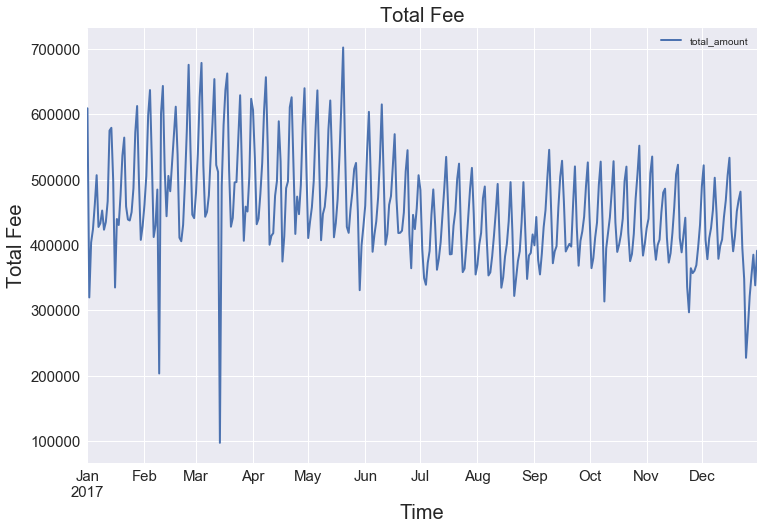

In [48]:
total_amount = pd.DataFrame()
total_amount['total_amount'] = df.total_amount.resample('D').sum()
ax = total_amount.plot(figsize=(12,8), linewidth=2, fontsize=15)
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2017-12-31'))
plt.xlabel('Time', fontsize=20);
plt.ylabel('Total Fee', fontsize=20);
plt.title('Total Fee', fontsize=20);
plt.savefig('total_amount_1.jpg')

# Fourier Analysis

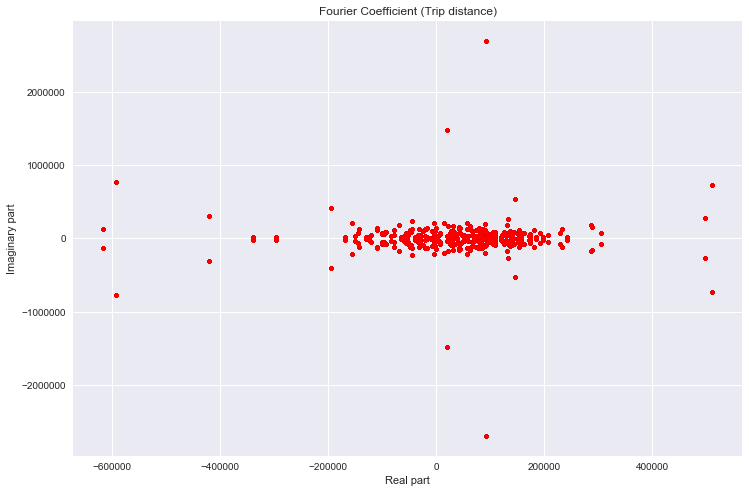

In [50]:
#fourier coefficient computation (daily)
fft_daily_rings = scipy.fftpack.fft(trip_distance.trip_distance)
fft_daily_rings[0] = 0
X = [fft_daily_rings.real for x in fft_daily_rings]
Y = [fft_daily_rings.imag for x in fft_daily_rings]
area = np.pi*3
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(X,Y,color='red',s=area, alpha=0.3)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Fourier Coefficient (Trip distance)')
plt.savefig('Fourier Coefficient distance.jpg')
plt.show()

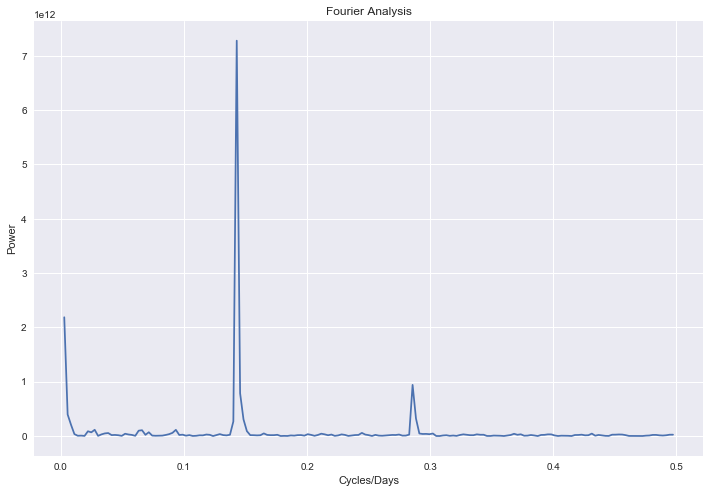

In [51]:
#fourier analysis
n = len(fft_daily_rings)
power = [ x ** 2 for x in abs(fft_daily_rings[1:n/2])]
maxfreq = 0.5                    # maximum frequency
freq = list(range(1,n/2))        # equally spaced frequency grid
coefficient = maxfreq / (n/2)
freq = [x * coefficient for x in freq]
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(freq,power)
plt.xlabel('Cycles/Days')
plt.ylabel('Power')
plt.title('Fourier Analysis')
plt.savefig('distance_f1.jpg')
plt.show()

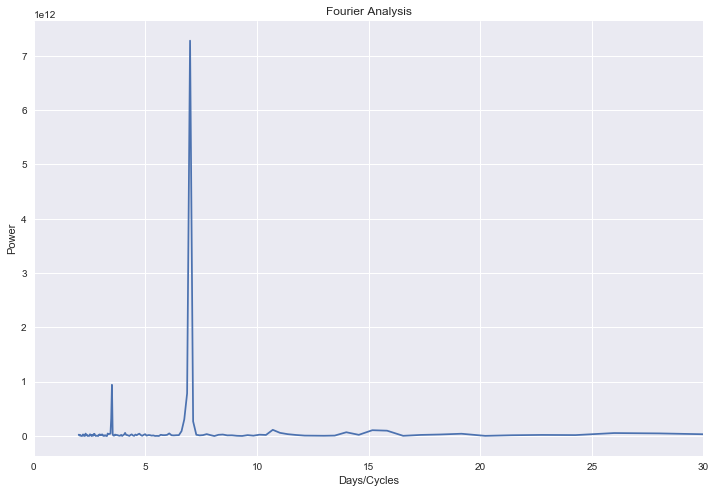

In [52]:
#fourier analysis
period = [ 1.0 / x for x in freq];
plt.plot(period,power)
xlim((0,30))
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Days/Cycles')
plt.ylabel('Power')
plt.title('Fourier Analysis')
plt.savefig('distance_f2.jpg')
plt.show()

# Stationarity

In [53]:
#define figure generation function
def generate(data,fn):
    #compute
    rolling_mean = pd.rolling_mean(data, window=7)
    rolling_std = pd.rolling_std(data, window=7)
    #Plot 
    Original = plt.plot(data, color='blue',label='Original')
    r_mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    r_std = plt.plot(rolling_std, color='black', label = 'Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.xlabel('Time');
    plt.ylabel('Trip Distance');
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig(fn)
    plt.show(block=False)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).std()
  """


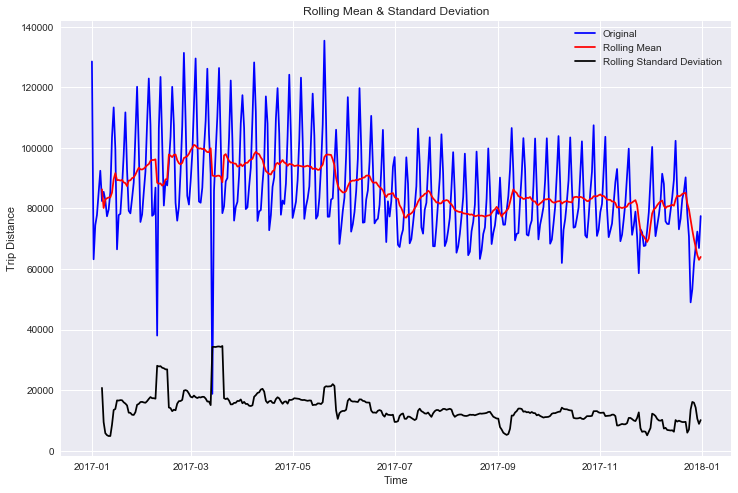

In [54]:
data = trip_distance
generate(data,'trdis_roll.jpg')

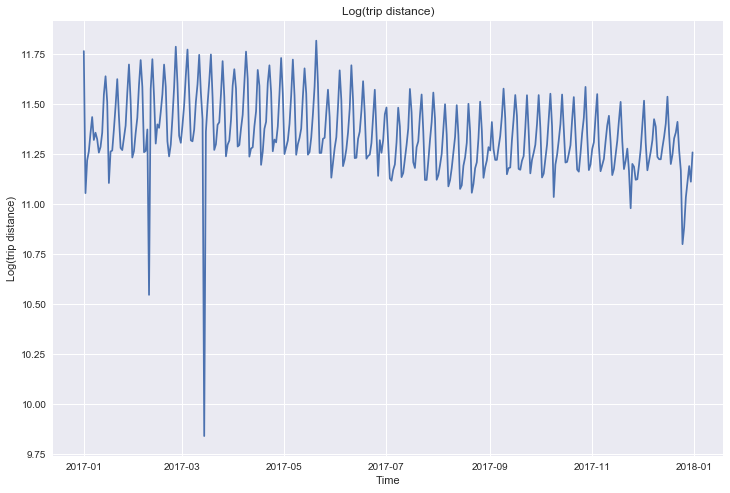

In [55]:
#plot log data
data_log = np.log(data)
plt.plot(data_log)
plt.xlabel('Time');
plt.ylabel('Log(trip distance)');
plt.title('Log(trip distance)')
plt.savefig('log_td.jpg')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  


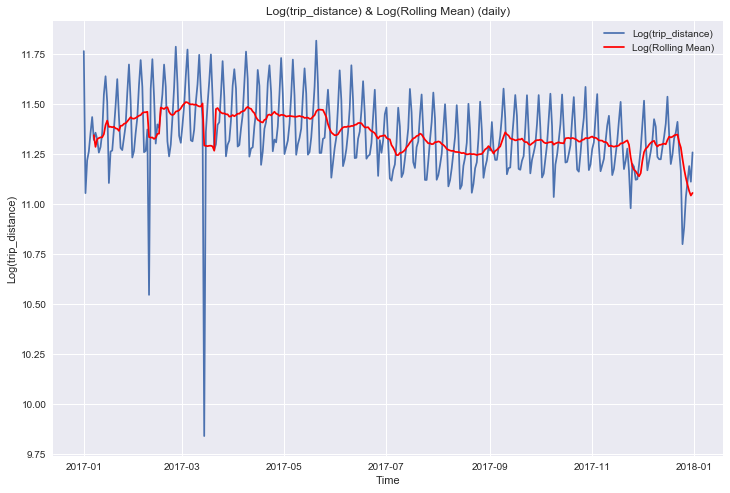

In [56]:
#generate log rolling mean and std
rolling_avg = pd.rolling_mean(data_log,7)
plt.plot(data_log, label='Log(trip_distance)')
plt.plot(rolling_avg, color='red', label='Log(Rolling Mean)')
plt.xlabel('Time');
plt.ylabel('Log(trip_distance)');
plt.title('Log(trip_distance) & Log(Rolling Mean) (daily)')
plt.legend(loc='best')
plt.savefig('log_td_mean.jpg')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).std()
  """


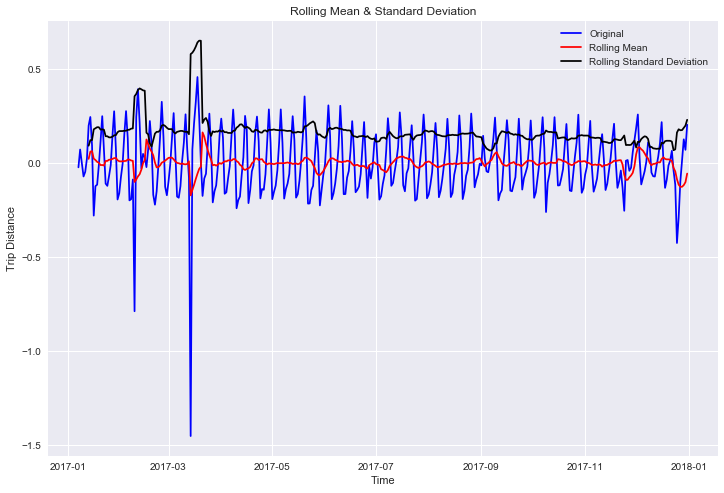

In [57]:
#generate rolling mean and std of log mean difference 
data_log_rolling_avg_diff = data_log - rolling_avg
data_log_rolling_avg_diff.dropna(inplace=True)
generate(data_log_rolling_avg_diff,'td_rm_std_logmean.jpg')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  


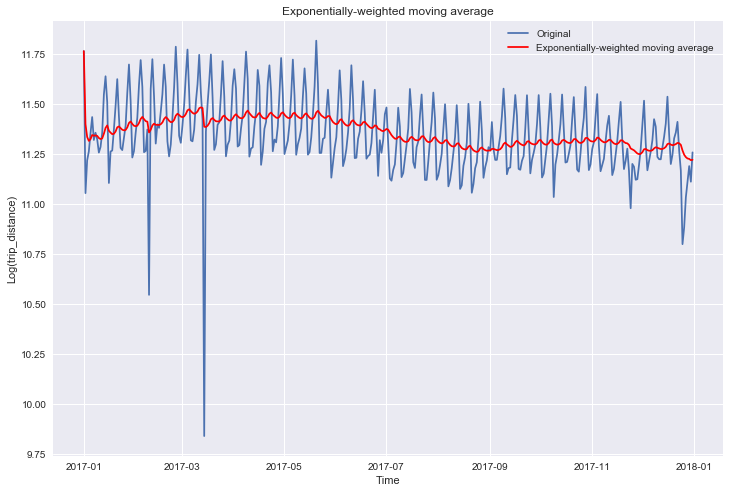

In [58]:
#generate log rolling mean and std after exponentially-weighted moving average
ew_avg = pd.ewma(data_log, halflife=12)
plt.plot(data_log, label='Original')
plt.plot(ew_avg, color='red', label = 'Exponentially-weighted moving average')
plt.legend(loc='best')
plt.xlabel('Time');
plt.ylabel('Log(trip_distance)');
plt.title('Exponentially-weighted moving average')
plt.savefig('td_log_ex.jpg')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).std()
  """


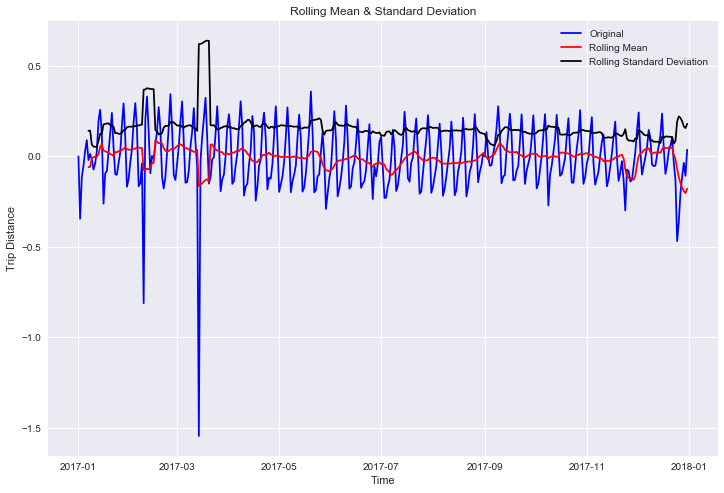

In [59]:
#generate log difference rolling mean and std after exponentially-weighted moving average
data_log_ew_diff = data_log - ew_avg
generate(data_log_ew_diff,'td_log_difference.jpg')

# Eliminating Trend and Seasonality
## Differencing

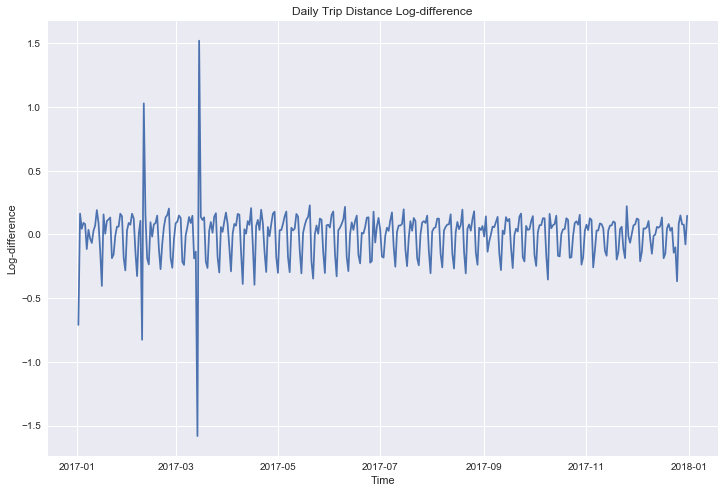

In [60]:
#plot log difference
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)
plt.xlabel('Time');
plt.ylabel('Log-difference');
plt.title('Daily Trip Distance Log-difference')
plt.savefig('rld.jpg')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).std()
  """


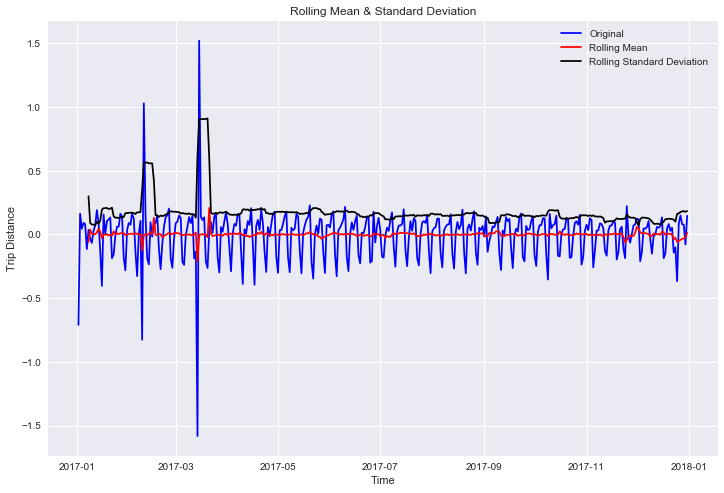

In [61]:
#plot rolling mean and std of log difference
generate(data_log_diff,'data_log_diff.jpg')

## Decomposition

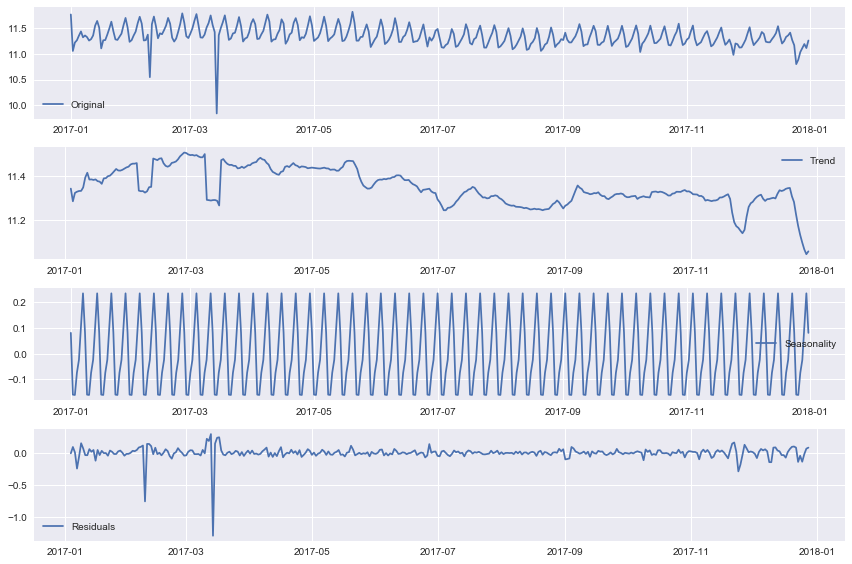

In [63]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('decomposition.jpg')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).std()
  """


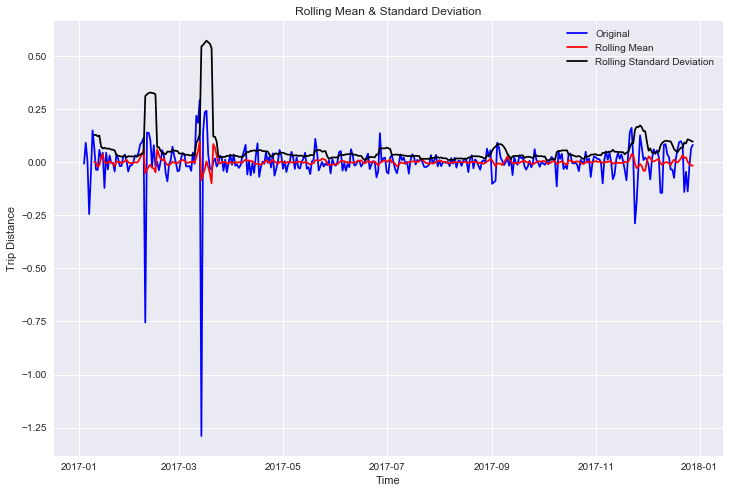

In [64]:
#plot rolling mean and std of residuals
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
generate(data_log_decompose,'data_log_decompose.jpg')

# Weekly Trip Distance

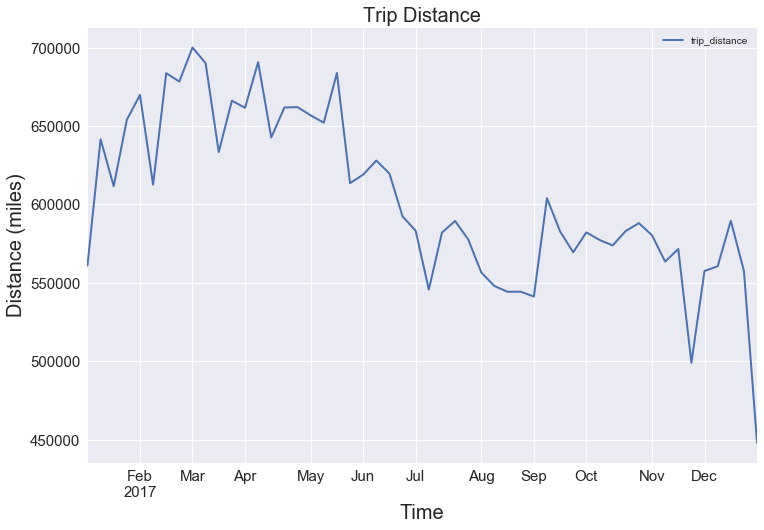

In [65]:
trip_distance_weekly = pd.DataFrame()
trip_distance_weekly['trip_distance'] = df.trip_distance.resample('W').sum()
trip_distance_weekly = trip_distance_weekly['2017']
trip_distance_weekly = trip_distance_weekly[1:]
ax = trip_distance_weekly.plot(figsize=(12,8), linewidth=2, fontsize=15)
ax.set_xlim(pd.Timestamp('2017-01-08'), pd.Timestamp('2017-12-31'))
plt.xlabel('Time', fontsize=20);
plt.ylabel('Distance (miles)', fontsize=20);
plt.title('Trip Distance', fontsize=20);
plt.savefig('trip_distance_weekly.jpg')

In [66]:
trip_distance_weekly.head()

,trip_distance
lpep_pickup_datetime,
2017-01-08,561018.13
2017-01-15,641586.39
2017-01-22,611644.62
2017-01-29,654009.26
2017-02-05,669858.46


In [67]:
log_summary = np.log(trip_distance_weekly.trip_distance)

In [68]:
log_summary_diff = log_summary - log_summary.shift()

In [69]:
log_summary_diff.dropna(inplace=True)

# ARIMA Model

In [70]:
from statsmodels.tsa.stattools import acf, pacf
acf_model = acf(log_summary_diff.values, nlags = 20)
pacf_model = pacf(log_summary_diff.values, nlags = 20)

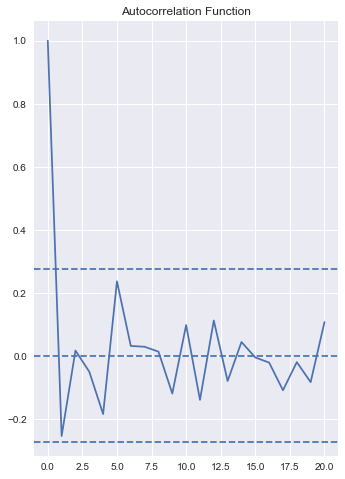

In [71]:
ax = plt.subplot(121) 
plt.plot(acf_model)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_summary_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_summary_diff)),linestyle='--')
plt.title('Autocorrelation Function')
plt.rcParams["figure.figsize"] = (12,5)
plt.savefig('Autocorrelation Function.jpg')

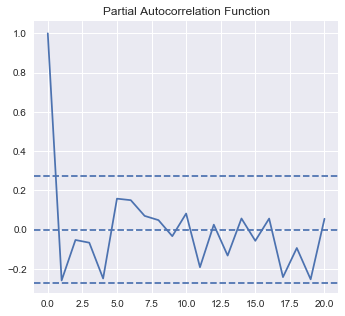

In [72]:
plt.subplot(121) 
plt.plot(pacf_model)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_summary_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_summary_diff)),linestyle='--')
plt.title('Partial Autocorrelation Function')
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig('Partial Autocorrelation Function.jpg')

In [73]:
from statsmodels.tsa.arima_model import ARIMA

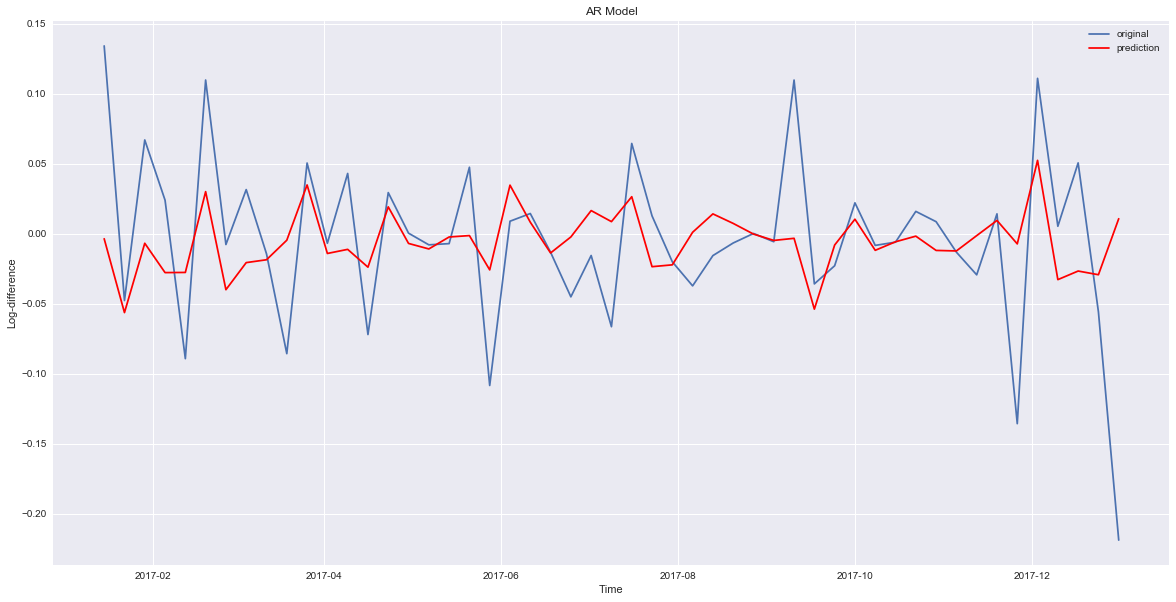

In [74]:
# AR model
AR_model = ARIMA(log_summary, order=(2, 1, 0))  
results_AR = AR_model.fit(disp=-1)  
plt.plot(log_summary_diff, label='original')
plt.legend(loc='best')
b=plt.plot(results_AR.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.title('AR Model')
plt.xlabel('Time')
plt.ylabel('Log-difference')
plt.savefig('AR Model.jpg')

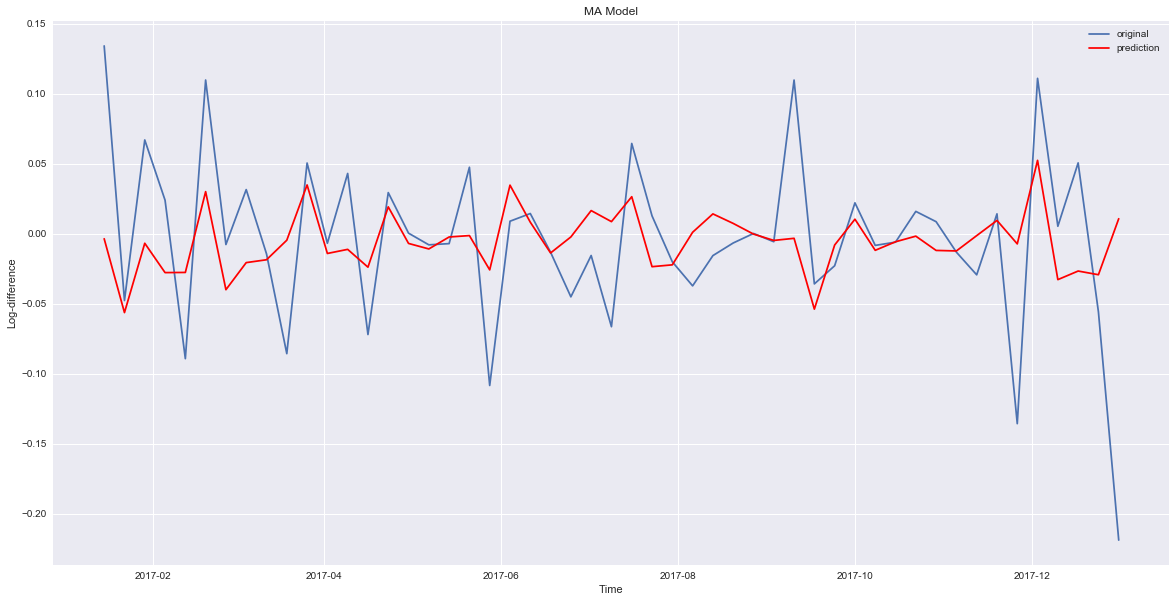

In [75]:
# MA model
MA_model = ARIMA(log_summary, order=(2, 1, 0))  
results_MA = MA_model.fit(disp=-1)  
plt.plot(log_summary_diff, label='original')
plt.legend(loc='best')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.title('MA Model')
plt.xlabel('Time')
plt.ylabel('Log-difference')
plt.savefig('MA Model.jpg')

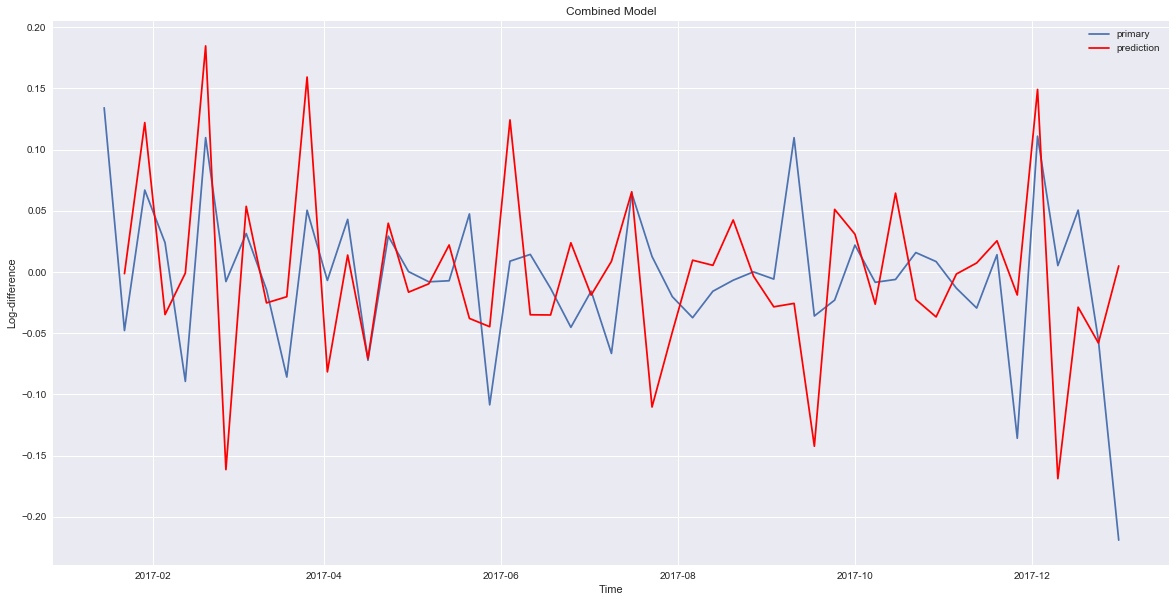

In [76]:
# ARIMA model
ARIMA_model = ARIMA(log_summary, order=(4, 2, 0))  
results_ARIMA = ARIMA_model.fit(disp=-1)  
plt.plot(log_summary_diff, label='primary')
plt.legend(loc='best')
plt.plot(results_ARIMA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.title('Combined Model')
plt.xlabel('Time')
plt.ylabel('Log-difference')
plt.savefig('Combined Mode.jpg')

In [77]:
ARIMA_diff_p = pd.Series(results_ARIMA.fittedvalues, copy=True)
ARIMA_diff_p_cumsum = ARIMA_diff_p.cumsum()
ARIMA_log_p = pd.Series(log_summary.ix[0], index=log_summary.index)
ARIMA_log_p = ARIMA_log_p.add(ARIMA_diff_p_cumsum,fill_value=0)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


# Forecasting Results

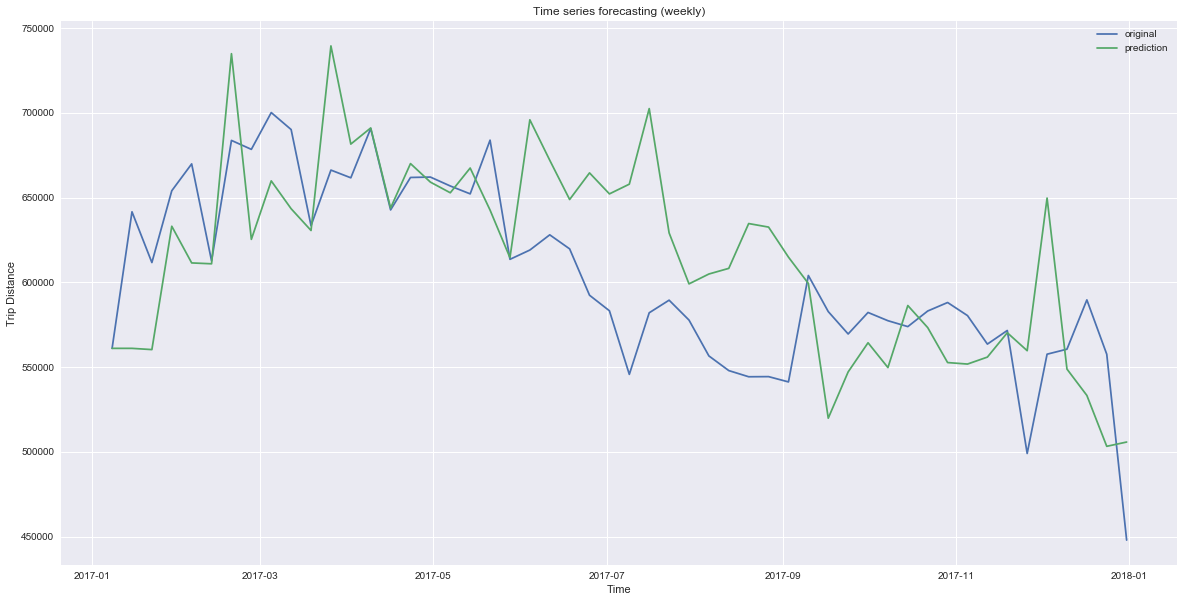

In [78]:
ARIMA_p = np.exp(ARIMA_log_p)
plt.plot(trip_distance_weekly, label = 'original')
plt.legend(loc='best')
plt.plot(ARIMA_p, label = 'prediction')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Trip Distance')
plt.title('Time series forecasting (weekly)')
plt.savefig('ARIMA_p.jpg')
plt.show()